In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv("/content/PS_20174392719_1491204439457_log.csv")

In [3]:
print(data.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0      0.0             0.0  
1  M2044282225             0.0             0.0      0.0             0.0  
2   C553264065             0.0             0.0      1.0             0.0  
3    C38997010         21182.0             0.0      1.0             0.0  
4  M1230701703             0.0             0.0      0.0             0.0  


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450130 entries, 0 to 450129
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            450130 non-null  int64  
 1   type            450130 non-null  object 
 2   amount          450130 non-null  float64
 3   nameOrig        450130 non-null  object 
 4   oldbalanceOrg   450129 non-null  float64
 5   newbalanceOrig  450129 non-null  float64
 6   nameDest        450129 non-null  object 
 7   oldbalanceDest  450129 non-null  float64
 8   newbalanceDest  450129 non-null  float64
 9   isFraud         450129 non-null  float64
 10  isFlaggedFraud  450129 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 37.8+ MB
None


In [5]:
print(data.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     1
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64


In [6]:
data = data.dropna(subset=['isFraud'])

In [7]:
data = data.drop(['nameOrig', 'nameDest'], axis=1)

In [8]:
le = LabelEncoder()
data['type'] = le.fit_transform(data['type'])

In [9]:
X = data.drop(['isFraud'], axis=1)
y = data['isFraud']

In [10]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X,y)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [14]:
y_pred_log = log_model.predict(X_test)

In [15]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=45)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=45)

In [16]:
y_pred_rf = rf_model.predict(X_test)

In [17]:
logistic_regression_scores = [
    accuracy_score(y_test, y_pred_log),
    precision_score(y_test, y_pred_log, average='weighted', zero_division=1),
    recall_score(y_test, y_pred_log, average='weighted', zero_division=1),
    f1_score(y_test, y_pred_log, average='weighted', zero_division=1)
]

random_forest_scores = [
    accuracy_score(y_test, y_pred_rf),
    precision_score(y_test, y_pred_rf, average='weighted', zero_division=1),
    recall_score(y_test, y_pred_rf, average='weighted', zero_division=1),
    f1_score(y_test, y_pred_rf, average='weighted', zero_division=1)
]

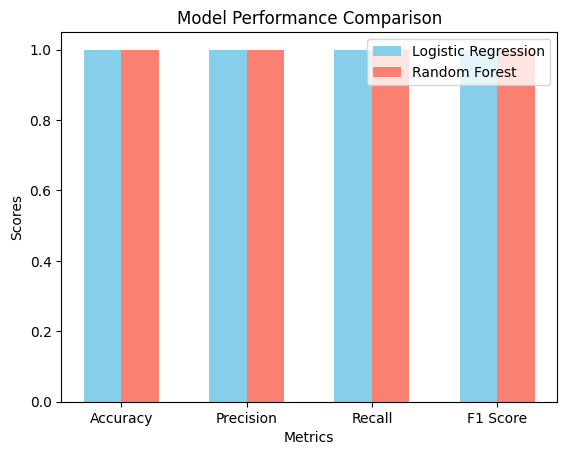

In [18]:
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
x = range(len(metrics))
width = 0.3

plt.bar(x, logistic_regression_scores, width=width, label='Logistic Regression', color='skyblue')
plt.bar([i + width for i in x], random_forest_scores, width=width, label='Random Forest', color='salmon')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.xticks([i + width / 2 for i in x], metrics)
plt.legend()

plt.show()

In [19]:
models = {'Logistic Regression': y_pred_log, 'Random Forest': y_pred_rf}
for model_name, y_pred in models.items():
  print(f"-----{model_name} Evaluation-----")
  print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
  print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.2f}")
  print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.2f}")
  print(f"F1_Score: {f1_score(y_test, y_pred, average='weighted'):.2f}")
  print("Confusion_Matrix:\n", confusion_matrix(y_test, y_pred))
  print("Classification_Report:\n", classification_report(y_test, y_pred))
  print("\n")

-----Logistic Regression Evaluation-----
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1_Score: 1.00
Confusion_Matrix:
 [[89976     0]
 [   50     0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Classification_Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     89976
         1.0       0.00      0.00      0.00        50

    accuracy                           1.00     90026
   macro avg       0.50      0.50      0.50     90026
weighted avg       1.00      1.00      1.00     90026



-----Random Forest Evaluation-----
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1_Score: 1.00
Confusion_Matrix:
 [[89975     1]
 [   23    27]]
Classification_Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     89976
         1.0       0.96      0.54      0.69        50

    accuracy                           1.00     90026
   macro avg       0.98      0.77      0.85     90026
weighted avg       1.00      1.00      1.00     90026





In [20]:
Feature_importances = pd.DataFrame({
    'features': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values(by='importance', ascending=False)
print(Feature_importances.head(10))

         features  importance
3   oldbalanceOrg    0.272569
2          amount    0.265719
6  newbalanceDest    0.199301
5  oldbalanceDest    0.148734
0            step    0.053447
1            type    0.037687
4  newbalanceOrig    0.022542
7  isFlaggedFraud    0.000000
